## Observations and Insights

## Dependencies and starter code

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df1=pd.merge(mouse_metadata, study_results, on='Mouse ID')
df = df1.loc[df1['Timepoint']==45,:]
# df = df1.copy()
df1.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [174]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
average = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).mean()
median = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).median()
variance =df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).var()
std_dev = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).std()
sem = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).sem()
summary = pd.merge(average, median, on= 'Drug Regimen', suffixes=(' Mean',' Median'))
summary = pd.merge(summary, variance, on= 'Drug Regimen')
summary = summary.rename(columns={'Tumor Volume (mm3)':'Variance'})
summary = pd.merge(summary,std_dev, on='Drug Regimen')
summary = summary.rename(columns={'Tumor Volume (mm3)':'Std. Dev.'})
summary = pd.merge(summary,sem, on='Drug Regimen')
summary = summary.rename(columns={'Tumor Volume (mm3) Mean':r'Tumor Volume Mean (mm$^3$)',
                                  'Tumor Volume (mm3) Median':r'Tumor Volume Median (mm$^3$)',
                                  'Tumor Volume (mm3)':'SEM'})
summary.head(30)

,Tumor Volume Mean (mm$^3$),Tumor Volume Median (mm$^3$),Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,36.236114,37.311846,31.460537,5.608969,1.223977
Ceftamin,64.132421,64.299830,10.585242,3.253497,0.902358
Infubinol,65.755562,66.083066,11.787426,3.433282,1.144427
Ketapril,70.662958,69.872251,23.229260,4.819674,1.453186
Naftisol,69.265506,69.563621,26.079104,5.106770,1.416363
Placebo,68.084082,69.042841,20.098783,4.483167,1.351726
Propriva,66.258529,64.957562,24.967290,4.996728,1.888586
Ramicane,34.955595,34.848627,30.101010,5.486439,1.226805
Stelasyn,68.438310,69.299149,27.340818,5.228845,1.576556


## Bar plots

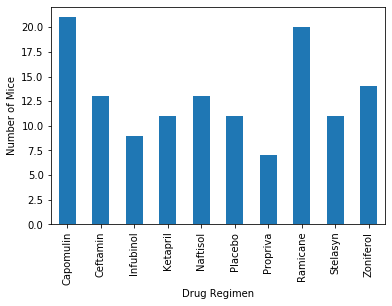

In [155]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = df.groupby(['Drug Regimen']).count()
counts.reindex()
countsplt = counts[['Mouse ID']]
countsplt.plot(kind='bar',legend = False)
plt.ylabel('Number of Mice')
plt.show()

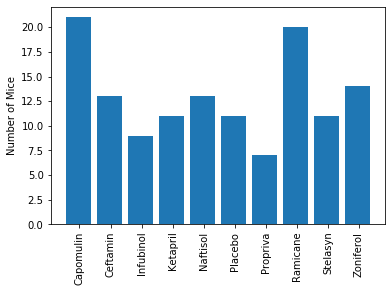

In [146]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
xval = np.arange(0,len(counts))
tick_locations = [x+.04 for x in xval]
plt.bar(xval,counts['Mouse ID'])
plt.xticks(tick_locations, counts.index, rotation="vertical")
plt.ylabel('Number of Mice')
plt.show()

## Pie plots

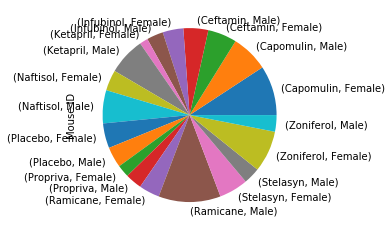

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = df.groupby(['Drug Regimen','Sex']).count()
#del gender['Drug Regimen']
del gender['Age_months']
del gender['Weight (g)']
del gender['Timepoint']
del gender['Tumor Volume (mm3)']
del gender['Metastatic Sites']
plot = gender.plot.pie(subplots=True, legend = False)

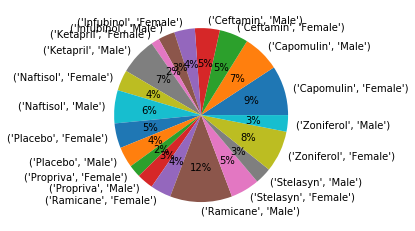

In [182]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender['Mouse ID'], labels = gender.index,autopct="%1.0f%%")
plt.show()

## Quartiles, outliers and boxplots

In [119]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin = df.loc[df['Drug Regimen']=='Capomulin',:]
Ramicane = df.loc[df['Drug Regimen']=='Ramicane',:]
Stelasyn = df.loc[df['Drug Regimen']=='Propriva',:]
Zoniferol = df.loc[df['Drug Regimen']=='Zoniferol',:]
Capo_sort=Capomulin['Tumor Volume (mm3)'].sort_values()
Capo_sort.head()
Capo_quartiles = Capo_sort.quantile([.25,.5,.75])
Capo_IQR=Capo_quartiles[0.75]-Capo_quartiles[0.25]
Capo_lower = Capo_quartiles[0.25]-1.5*Capo_IQR
Capo_upper = Capo_quartiles[0.75]+1.5*Capo_IQR
Capo_outliers=[]
for x in Capo_sort: 
    if x> Capo_upper:
        Capo_outliers.append(x)
    elif x < Capo_lower:
        Capo_outliers.append(x)
print(Capo_outliers)

[23.34359787, 25.47214326]


In [118]:
Rami_sort=Ramicane['Tumor Volume (mm3)'].sort_values()
Rami_quartiles = Rami_sort.quantile([.25,.5,.75])
Rami_IQR=Rami_quartiles[0.75]-Rami_quartiles[0.25]
Rami_lower = Rami_quartiles[0.25]-1.5*Rami_IQR
Rami_upper = Rami_quartiles[0.75]+1.5*Rami_IQR
Rami_outliers=[]
for x in Rami_sort: 
    if x> Rami_upper:
        Rami_outliers.append(x)
    elif x < Rami_lower:
        Rami_outliers.append(x)
print(Rami_outliers)


[22.05012627]


In [117]:
Stel_sort=Stelasyn['Tumor Volume (mm3)'].sort_values()
Stel_quartiles = Stel_sort.quantile([.25,.5,.75])
Stel_IQR=Stel_quartiles[0.75]-Stel_quartiles[0.25]
print(Rami_IQR)
Stel_lower = Stel_quartiles[0.25]-1.5*Stel_IQR
Stel_upper = Stel_quartiles[0.75]+1.5*Stel_IQR
Stel_outliers=[]
for x in Stel_sort: 
    if x> Stel_upper:
        Stel_outliers.append(x)
    elif x < Stel_lower:
        Stel_outliers.append(x)
print(Stel_outliers)

8.325365415000007
[70.16774899, 70.49278763, 71.17246321, 72.45542116]


In [54]:
Zon_sort=Zoniferol['Tumor Volume (mm3)'].sort_values()
Zon_quartiles = Zon_sort.quantile([.25,.5,.75])
Zon_IQR=Zon_quartiles[0.75]-Zon_quartiles[0.25]
print(Zon_IQR)
Zon_lower = Zon_quartiles[0.25]-1.5*Zon_IQR
Zon_upper = Zon_quartiles[0.75]+1.5*Zon_IQR
Zon_outliers=[]
for x in Zon_sort: 
    if x> Zon_upper:
        Zon_outliers.append(x)
    elif x < Capo_lower:
        Zon_outliers.append(x)
print(Zon_outliers)

5.723614500000004
[]


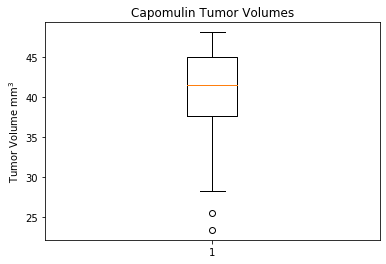

In [147]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Tumor Volumes')
ax1.set_ylabel(r'Tumor Volume mm$^3$')
ax1.boxplot(Capomulin['Tumor Volume (mm3)'])
plt.show()

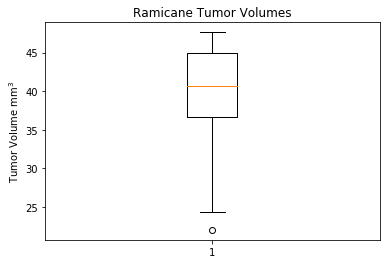

In [148]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Tumor Volumes')
ax1.set_ylabel(r'Tumor Volume mm$^3$')
ax1.boxplot(Ramicane['Tumor Volume (mm3)'])
plt.show()

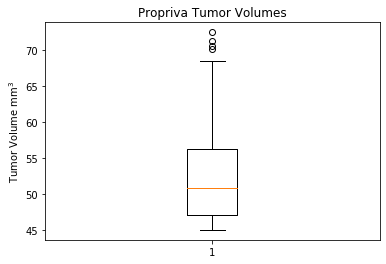

In [149]:
fig1, ax1 = plt.subplots()
ax1.set_title('Propriva Tumor Volumes')
ax1.set_ylabel(r'Tumor Volume mm$^3$')
ax1.boxplot(Stelasyn['Tumor Volume (mm3)'])
plt.show()

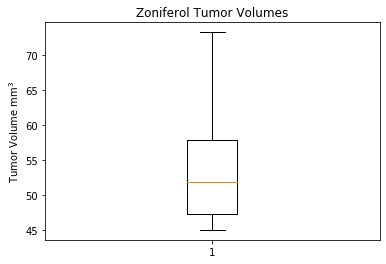

In [150]:
fig1, ax1 = plt.subplots()
ax1.set_title('Zoniferol Tumor Volumes')
ax1.set_ylabel(r'Tumor Volume mm$^3$')
ax1.boxplot(Zoniferol['Tumor Volume (mm3)'])
plt.show()

## Line and scatter plots

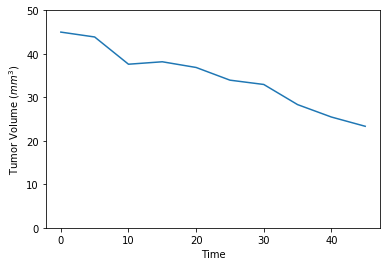

In [99]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_mice=df1.loc[df1['Drug Regimen']=='Capomulin']
s185=capo_mice.loc[capo_mice['Mouse ID']=='s185']['Tumor Volume (mm3)']
s185
xval = np.arange(0,len(s185))
xval = xval*5
xval
plt.plot(xval,s185)
plt.xlabel('Time (days)')
plt.ylabel(r'Tumor Volume $(mm^3)$')
plt.ylim(0,max(s185)+5)
plt.show()

(10.0, 30.0)

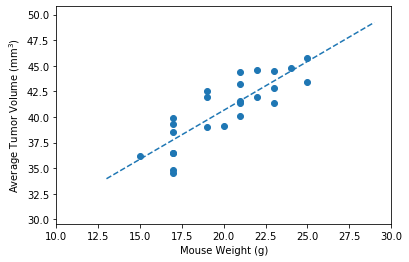

In [170]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_averages=capo_mice.groupby('Mouse ID').mean()
capo_averages
plt.scatter(capo_averages['Weight (g)'],capo_averages['Tumor Volume (mm3)'])
xval = np.arange(min(capo_averages['Weight (g)'])-2,max(capo_averages['Weight (g)'])+6,4)
fit = slope * xval + intercept
plt.plot(xval,fit,"--")
plt.xlabel('Mouse Weight (g)')
plt.ylabel(r'Average Tumor Volume (mm$^3$)')
plt.ylim(min(capo_averages['Tumor Volume (mm3)'])-5,max(capo_averages['Tumor Volume (mm3)'])+5)
plt.xlim(min(capo_averages['Weight (g)'])-5,max(capo_averages['Weight (g)'])+5)

In [157]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capo_averages['Weight (g)'],capo_averages['Tumor Volume (mm3)'])
correlation = st.pearsonr(capo_averages['Weight (g)'],capo_averages['Tumor Volume (mm3)'])
print(round(correlation[0],2))

0.84


In [151]:
print(slope, intercept, rvalue, pvalue, stderr)

0.9544396890241045 21.552160532685015 0.8419363424694718 1.3225722434712642e-07 0.1275435903320134
